In [31]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_style('darkgrid')

According to the Central Limit Theorem (CLT), the distribution of sample proportions (the sampling distribution) should be nearly normal. 
<br>The mean of the sampling distribution is approximately equal to <b>popoulation proportion (p)</b> 
<br>and the standard error (the standard deviation of sample proportions) should be approximately equal to 
<br>the <b>square root of probability of success (p) times the probability of failure (1-p) divided by the sample size (sqrt( p * (1-p) / size ))</b>.

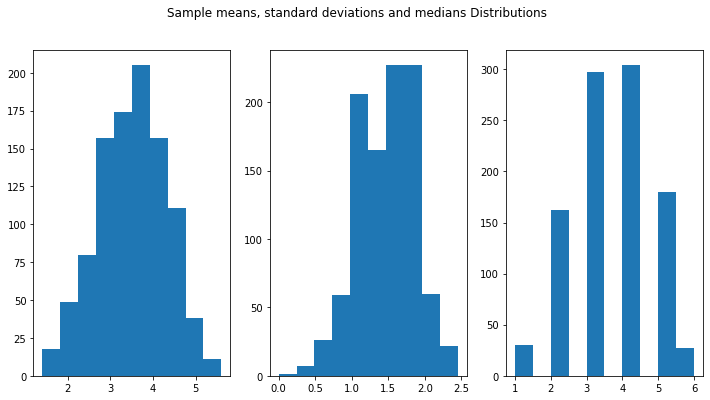

In [2]:
die = pd.Series([1, 2, 3, 4, 5, 6])

sample_means   = []
sample_medians = []
sample_stds    = []
# Loop 30 times to take 30 means
for _ in range(1000):
    # Take sample of size 5 from dice sides with replacement
    cur_sample = die.sample(5, replace=True)
    sample_means.append(np.mean(cur_sample))
    sample_stds.append(np.std(cur_sample))
    sample_medians.append(np.median(cur_sample))

fig, axs = plt.subplots(1,3)
fig.suptitle('Sample means, standard deviations and medians Distributions')
axs[0].hist(sample_means)
axs[1].hist(sample_stds)
axs[2].hist(sample_medians)
plt.show()

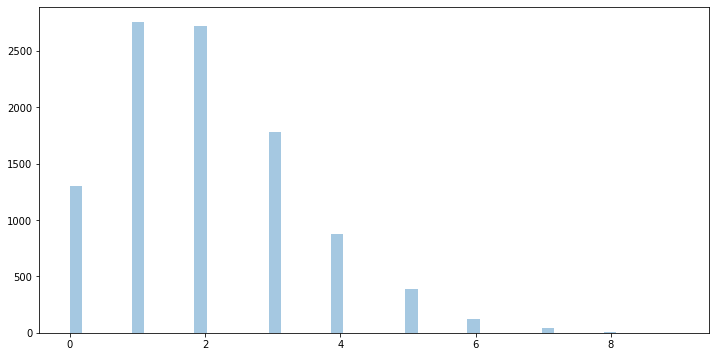

In [3]:
sample = st.poisson.rvs(mu=2, size=10000, random_state=13)

# Plot the sample
sns.distplot(sample, kde=False)
plt.show()

In [8]:
# Emergency - 911 Calls from montgomery country
calls = pd.read_csv('C:/Users/zakpa/.kaggle/Emergency991/911.csv')[:100_000]
# https://www.kaggle.com/mchirico/montcoalert

In [9]:
calls_by_date = calls.set_index(pd.DatetimeIndex(calls['timeStamp']))['timeStamp']
calls_per_day = calls_by_date.groupby(calls_by_date.index.date).count()
calls_per_day.head()

2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
Name: timeStamp, dtype: int64

The Law of Large Numbers says that as one draws larger and larger samples from a population with mean μ and finite variance, the sample mean will converge towards μ. More formally, if Xn is a sample of size n drawn iid from the population, then

limn→∞X¯n=μ

This law is useful for estimating the average value of a random variable in a population.

In [6]:
calls_mean = np.mean(calls_per_day)
print(calls_mean)

def sampling_error(data, sample_means):
    return abs(np.mean(data)-np.mean(sample_means))

errors = []
for size in range(10,1000,10):
    sample_means = []
    for _ in range(size):
        cur_sample = calls_per_day.sample(size,replace=True)
        sample_means.append(np.mean(cur_sample))
    errors.append(abs(calls_mean-np.mean(sample_means)))

383.1417624521073


Here we examine the residuals between the true population mean and the observed sample means.

Residual plot
A plot of the residuals vs sample sizes. Notice the trend of reduced residuals as sample sizes increases.

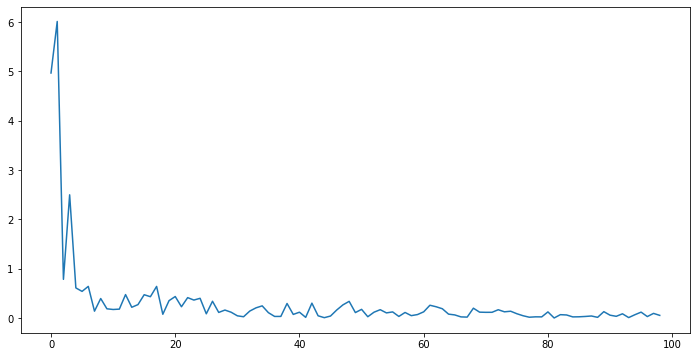

In [7]:
plt.plot(errors)
plt.show()

In [12]:
import scipy.stats as sps

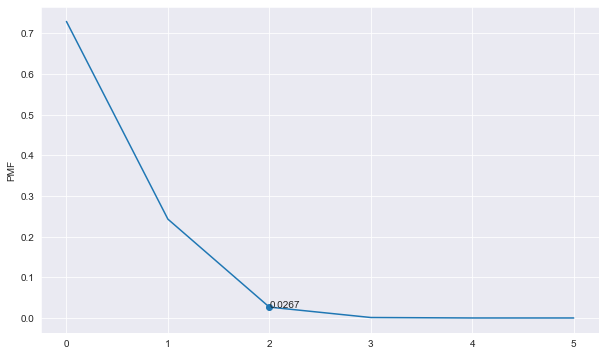

In [38]:
h = sps.hypergeom(M=100, n=5, N=6)
x = np.arange(6)
pmf = h.pmf(x)
sns.lineplot(x, pmf)
plt.ylabel('PMF')
pmfin2 = sps.hypergeom(M=100, n=5, N=6).pmf(2)
plt.text(2, pmfin2, str(round(pmfin2, 4)))
plt.scatter(2,pmfin2)

In [21]:
sps.hypergeom(M=100, n=5, N=6).pmf(2)

0.026706418274901403

Text(24.3, 0.1, 'P(24<X<26)')

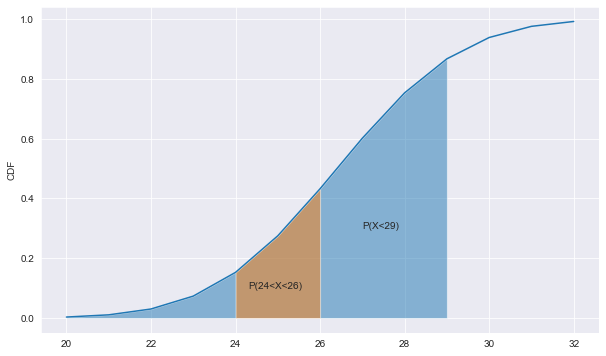

In [64]:
n = sps.norm(26.4, 2.34)

x = np.arange(20,33)
plt.plot(x, n.cdf(x))
plt.ylabel('CDF')

area1 = np.arange(20,30)
area2 = np.arange(24, 27)
plt.fill_between(area1, n.cdf(area1), alpha=0.5)
plt.fill_between(area2, n.cdf(area2), alpha=0.5)

plt.text(27, 0.3, 'P(X<29)')
plt.text(24.3, 0.1, 'P(24<X<26)')